#Bagging & Boosting KNN & Stacking Assignment


**Question 1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?**

### **Question 1: What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?**

---

### **Fundamental Idea Behind Ensemble Techniques**

The **fundamental idea** behind ensemble techniques is to **combine multiple models** (often referred to as "weak learners" or "base models") to produce a **more robust and accurate predictive model**. The intuition is that while a single model might make mistakes, combining several models can help to **reduce errors**, **improve generalization**, and **enhance performance**.

Ensemble techniques aim to:

* Reduce **variance** (overfitting),
* Reduce **bias** (underfitting),
* Improve **prediction accuracy**.

---

### **Bagging vs. Boosting: Approach and Objective**

| Feature                  | **Bagging (Bootstrap Aggregating)**                              | **Boosting**                                                       |
| ------------------------ | ---------------------------------------------------------------- | ------------------------------------------------------------------ |
| **Goal**                 | Reduce **variance** and prevent **overfitting**                  | Reduce **bias** and improve **accuracy**                           |
| **How Models Are Built** | Models are trained **independently in parallel**                 | Models are trained **sequentially**, each correcting the previous  |
| **Data Sampling**        | Uses **bootstrapped samples** (random sampling with replacement) | Uses **weighted data**, focusing more on **misclassified samples** |
| **Weighting of Models**  | All models usually have **equal weight** in final prediction     | Later models are given **more importance** (based on performance)  |
| **Common Algorithms**    | Random Forest (ensemble of decision trees)                       | AdaBoost, Gradient Boosting, XGBoost, LightGBM                     |
| **Strengths**            | Good for reducing variance; stable with high-dimensional data    | Good for reducing bias; builds strong learners from weak ones      |
| **Risk**                 | May not reduce bias enough                                       | Prone to overfitting if not regularized properly                   |

---

### **In Summary**:

* **Bagging** builds multiple models **independently** and combines their outputs to stabilize predictions and reduce overfitting.
* **Boosting** builds models **sequentially**, each learning from the mistakes of the previous, to produce a stronger overall model.


**Question 2: Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.**

### **Question 2: How Random Forest Classifier Reduces Overfitting Compared to a Single Decision Tree**

---

A **single decision tree** is a powerful but **high-variance** model. It can easily **overfit** the training data, especially if the tree is deep and allowed to grow without restrictions — it tends to memorize the training data rather than generalize from it.

The **Random Forest Classifier** is an **ensemble of decision trees**, and it significantly reduces overfitting by introducing **randomness** and **aggregation**, which increases model generalization.

---

### ✅ **How Random Forest Reduces Overfitting**

1. **Bootstrap Aggregating (Bagging)**:

   * Each tree is trained on a **random sample (with replacement)** of the training data.
   * This introduces **diversity** in the trees, so not all of them see the same data.
   * The final prediction is made by **majority voting** (for classification), which smooths out overfitting by individual trees.

2. **Random Feature Selection**:

   * At each split in a tree, only a **random subset of features** is considered (not all features).
   * This ensures that trees are **decorrelated**, as they learn different decision boundaries.
   * As a result, the ensemble avoids learning the same noisy patterns and reduces variance.

---

### 🔧 **Key Hyperparameters That Help Control Overfitting**

1. ### **`n_estimators`** (Number of Trees)

   * **Definition**: The number of decision trees in the forest.
   * **Effect**: More trees generally improve performance and **reduce variance**, but after a point, returns diminish.
   * **Role in Overfitting**: Increasing `n_estimators` tends to **reduce overfitting**, as the model becomes more stable and robust to noise.

2. ### **`max_features`** (Maximum Features Considered at Each Split)

   * **Definition**: The number of features randomly selected to consider for splitting at each node.
   * **Effect**: Lower values increase tree diversity and **reduce correlation** between trees.
   * **Role in Overfitting**: By limiting `max_features`, Random Forest ensures trees are **more diverse**, which helps prevent the model from overfitting the training data.

---

### ✅ **Bonus Hyperparameter (Optional but Relevant)**

* **`max_depth`**:

  * Limits how deep each tree can grow.
  * Prevents individual trees from becoming too complex and overfitting their subset of data.

---

### ✅ **Summary**

| **Aspect**          | **Single Decision Tree**                    | **Random Forest Classifier**                             |
| ------------------- | ------------------------------------------- | -------------------------------------------------------- |
| Overfitting         | Prone to overfitting, especially with depth | Reduces overfitting through averaging                    |
| Variance            | High                                        | Lower, due to ensemble effect                            |
| Key Hyperparameters | `max_depth`                                 | `n_estimators`, `max_features`, (optionally `max_depth`) |


**Question 3: What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.**

### **Question 3: What is Stacking in Ensemble Learning?**

---

### ✅ **What is Stacking?**

**Stacking** (short for **stacked generalization**) is an **ensemble learning technique** that combines the predictions of multiple different models (**base learners**) using another model (called a **meta-learner** or **blender**) to make a final prediction.

* **Base Learners**: Diverse models trained on the same dataset (e.g., decision tree, logistic regression, SVM, etc.)
* **Meta-Learner**: A model that takes the **predictions of base learners as input** and learns how to best combine them.

---

### ✅ **How It Works (High-Level Steps)**

1. Train multiple **base models** on the training dataset.
2. Generate predictions from these models on a **validation set** (to avoid data leakage).
3. Use these predictions as **features** to train a **meta-model**.
4. At inference time, base models make predictions, and the meta-model uses those predictions to output the final result.

---

### 🔁 **How Stacking Differs from Bagging and Boosting**

| Feature                | **Bagging**                                      | **Boosting**                             | **Stacking**                                 |
| ---------------------- | ------------------------------------------------ | ---------------------------------------- | -------------------------------------------- |
| **Model Type**         | Same type (e.g., many decision trees)            | Same type, sequentially improved         | Different types of models combined           |
| **Training Style**     | Parallel, independent                            | Sequential, each model corrects previous | Parallel base models + separate meta-model   |
| **Objective**          | Reduce **variance**                              | Reduce **bias**                          | Improve **overall performance via blending** |
| **Combining Strategy** | Voting (classification) / Averaging (regression) | Weighted combination                     | **Learned** combination (via meta-learner)   |

---

### ✅ **Simple Example Use Case**

**Problem**: Predict whether a customer will churn in a telecom company.

**Approach using Stacking**:

1. **Base Models**:

   * **Model 1**: Logistic Regression
   * **Model 2**: Random Forest
   * **Model 3**: Gradient Boosting

2. **Meta-Model**:

   * Train a **Logistic Regression** or **XGBoost** model using the predictions of the above three models as input features.

3. **Result**:

   * The meta-model learns how to **weigh the strengths** of each base model. For example, it might learn that:

     * Random Forest is better at catching "non-churn"
     * Gradient Boosting is better at predicting "churn"
     * Logistic Regression handles linear patterns well

This **blending of strengths** often leads to **better overall accuracy** than any single model alone.

---

### ✅ **Summary**

* **Stacking** is an advanced ensemble technique where multiple diverse models are combined using a meta-model.
* It differs from **bagging** and **boosting** in that:

  * It uses **heterogeneous models**,
  * It **learns** how to combine them,
  * It involves a **second-level model** (meta-learner) rather than simple voting or averaging.


**Question 4:What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?**

### **Question 4: What is the OOB Score in Random Forest, and Why Is It Useful?**

---

### ✅ **What is OOB Score?**

**OOB (Out-of-Bag) Score** is an internal **validation accuracy** estimate used in **Random Forests**.

When a Random Forest builds each decision tree, it uses a **bootstrap sample** — a random sample **with replacement** from the training dataset. As a result, about **1/3 of the training data is not used** to train a given tree.

These unused data points are called **Out-of-Bag (OOB) samples** for that tree.

---

### ✅ **How the OOB Score Works**

1. Each tree is trained on a **bootstrapped subset** of the training data.
2. For each data point in the training set:

   * It is likely to be **OOB** (i.e., excluded) from training for about **1/3 of the trees**.
3. After the forest is trained:

   * Each data point’s prediction is made by **aggregating predictions from the trees that did not see it during training**.
4. The **OOB score** is the **accuracy (or other metric)** of these predictions across all OOB samples.

---

### ✅ **Why Is the OOB Score Useful?**

* **Acts as a built-in cross-validation**: No need to create a separate validation set or use k-fold cross-validation.
* **Saves data**: You can train and validate using the **entire training dataset** without holding back a portion for validation.
* **Faster model evaluation**: Since it’s computed during training, it avoids additional computational steps.

---

### ✅ **How It Helps Without a Separate Validation Set**

| Without OOB Score                    | With OOB Score                                          |
| ------------------------------------ | ------------------------------------------------------- |
| Need to split data into train/val    | Entire data can be used for training                    |
| Requires separate evaluation pass    | Evaluation happens during training                      |
| Risk of overfitting to training data | OOB score gives **unbiased estimate** of generalization |

The OOB score gives an **honest estimate** of how the Random Forest will perform on unseen data, especially useful when the dataset is small.

---

### ✅ **Example:**

Suppose we have 1000 training samples:

* Each tree is trained on a bootstrapped sample (~67% of the data).
* For each of the 1000 samples, we average predictions **only from trees where the sample was OOB**.
* Compute accuracy of these predictions: this is the **OOB score**.


**Question 5: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases**

### **Question 5: Comparison of AdaBoost and Gradient Boosting**

Both **AdaBoost** and **Gradient Boosting** are **boosting algorithms** — ensemble methods that build strong models by combining many weak learners (typically decision trees). However, they differ in **how they handle errors**, **adjust weights**, and are **used** in practice.

---

### ✅ **1. How They Handle Errors from Weak Learners**

| **Aspect**         | **AdaBoost**                                                    | **Gradient Boosting**                                                               |
| ------------------ | --------------------------------------------------------------- | ----------------------------------------------------------------------------------- |
| **Error Handling** | Focuses on **misclassified instances** from previous models     | Focuses on **residual errors** (differences between prediction and actual values)   |
| **Approach**       | Increases the **importance (weights)** of misclassified samples | Models the **gradient of the loss function** to correct the previous model's errors |

---

### ✅ **2. Weight Adjustment Mechanism**

| **Aspect**             | **AdaBoost**                                                                                              | **Gradient Boosting**                                                       |
| ---------------------- | --------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------- |
| **Sample Weights**     | Maintains and **updates weights on training examples**                                                    | Does **not explicitly update sample weights**                               |
| **How Weights Change** | - Misclassified samples → **higher weight**                <br> - Correctly classified → **lower weight** | - Computes **residuals** (errors), and fits the next model to predict these |
| **Learner Weights**    | Assigns **weights to weak learners** based on accuracy                                                    | All learners usually have **equal weight**, unless adjusted manually        |

---

### ✅ **3. Typical Use Cases**

| **Aspect**            | **AdaBoost**                                                               | **Gradient Boosting**                                                                            |
| --------------------- | -------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------ |
| **Performance**       | Performs well on **clean, low-noise** datasets                             | Handles **complex, noisy data** and **non-linear relationships** better                          |
| **Speed**             | Faster to train, especially with shallow learners (e.g., stumps)           | Slower, but **more powerful** and **customizable**                                               |
| **Interpretability**  | More interpretable with **decision stumps** (one-level trees)              | Less interpretable, especially with deep trees and many iterations                               |
| **Popular Libraries** | Available in **`scikit-learn`**                                            | Used in advanced libraries like **XGBoost, LightGBM, CatBoost**, etc.                            |
| **Use Cases**         | - Face detection <br> - Spam detection <br> - Simple binary classification | - Credit scoring <br> - Customer churn prediction <br> - Ranking problems (e.g., search engines) |

---

### ✅ **Summary Table**

| **Feature**           | **AdaBoost**                   | **Gradient Boosting**                             |
| --------------------- | ------------------------------ | ------------------------------------------------- |
| Error focus           | Misclassified samples          | Residuals of previous model                       |
| Weight mechanism      | Adjusts **sample weights**     | Models **gradients of loss function**             |
| Base learner type     | Often uses **decision stumps** | Typically uses **deeper trees**                   |
| Robust to noise       | Less robust                    | More robust (with regularization)                 |
| Speed                 | Faster                         | Slower but more accurate                          |
| Custom loss functions | Limited                        | Supports custom loss functions                    |
| Libraries             | scikit-learn (basic version)   | XGBoost, LightGBM, CatBoost, HistGradientBoosting |

---

### ✅ **Conclusion**

* **AdaBoost**: Simple and effective when data is clean and noise-free; emphasizes **sample weights**.
* **Gradient Boosting**: More flexible and powerful; emphasizes **error gradients** and works better on **complex problems**.

Use **AdaBoost** for simpler problems, and **Gradient Boosting** for tasks where higher accuracy and robustness are critical.


**Question 6:Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.**

### **Question 6: Why Does CatBoost Perform Well on Categorical Features Without Requiring Extensive Preprocessing?**

---

### ✅ **Overview**

**CatBoost** is a gradient boosting algorithm developed by Yandex that is specially designed to handle **categorical features** **natively**, without requiring the usual preprocessing steps like one-hot encoding or label encoding.

This built-in handling of categorical variables is one of the **key strengths** of CatBoost, making it both **efficient** and **accurate** on datasets with many categorical columns.

---

### ✅ **Why CatBoost Performs Well on Categorical Features**

1. ### **No Need for One-Hot Encoding**

   * Traditional gradient boosting methods (like XGBoost or LightGBM) require **manual encoding** of categorical variables.
   * CatBoost **natively understands** categorical features and processes them **internally**, reducing preprocessing time and complexity.

2. ### **Uses Target-Based Statistics with Permutation**

   * CatBoost converts categorical values into **numeric representations** using a method called **"ordered target statistics"**.
   * Instead of simply replacing categories with global averages (which would cause overfitting), CatBoost:

     * Calculates **mean target values** for each category.
     * Uses a **permutation-based approach** to prevent **target leakage** (i.e., using future data to influence current decisions).
     * This ensures that the model learns **category impact in a stable and unbiased way**.

3. ### **Efficient Encoding**

   * CatBoost uses a technique similar to **mean encoding**, but with safeguards:

     * **Multiple permutations** are used to compute encodings.
     * **Bayesian averaging** is applied to prevent overfitting.
   * This approach captures **informative signals** from categorical variables more effectively than one-hot or label encoding.

4. ### **Built-in Handling = Faster Experimentation**

   * No need to manually encode variables.
   * Reduces feature engineering burden.
   * Improves pipeline efficiency, especially in production environments.

---

### ✅ **Example: How CatBoost Handles Categorical Features**

Suppose you have a feature called `City` with values: `['New York', 'Paris', 'London', 'New York', ...]`.

Instead of:

* **One-hot encoding** → creates multiple binary columns: `City_NewYork`, `City_Paris`, etc.
* **Label encoding** → assigns arbitrary integers: `New York → 1`, `Paris → 2`, etc.

CatBoost:

* Calculates something like:
  `City → mean(target | City)`
  But does this **carefully**, using permutations and regularization to avoid overfitting.

---

### ✅ **Summary**

| **Aspect**                      | **CatBoost's Approach**                             |
| ------------------------------- | --------------------------------------------------- |
| Preprocessing required          | Minimal (no one-hot or label encoding needed)       |
| Categorical handling            | Target statistics + permutations (ordered boosting) |
| Overfitting risk                | Low, due to target leakage prevention               |
| Ease of use                     | High — just pass categorical column names           |
| Performance on categorical data | Excellent                                           |

---

### ✅ **Conclusion**

CatBoost performs well on categorical features because it:

* **Natively processes** them,
* Uses **ordered target statistics** to encode them,
* Prevents **target leakage and overfitting**, and
* **Simplifies preprocessing**, allowing for faster and more accurate modeling with minimal effort.


**Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization**
**Task:**
**1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan)**

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# KNN without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluation
print("🚫 Without Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create pipeline: Scaling + KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

pipeline.fit(X_train, y_train)
y_pred_scaled = pipeline.predict(X_test)

# Evaluation
print("✅ With StandardScaler:")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'knn__n_neighbors': list(range(1, 21)),
    'knn__metric': ['euclidean', 'manhattan']
}

# Reuse pipeline
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best parameters and model
print("🎯 Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# Final evaluation on test set
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("🏁 Final Model Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


🚫 Without Scaling:
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

✅ With StandardScaler:
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

🎯 Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 6}
Best CV Accuracy: 0

**Question 8 : PCA + KNN with Variance Analysis and Visualization**
**Task:**
**1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class)**

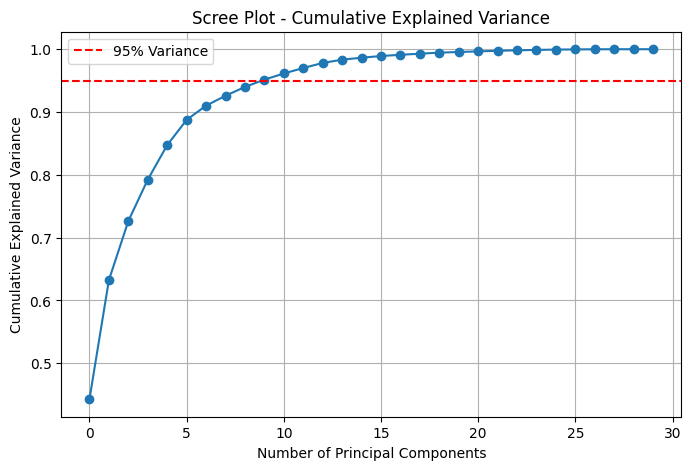

📊 Number of components to retain 95% variance: 10
🧪 Accuracy on original data: 0.9591
🧪 Accuracy on PCA-reduced data (95% variance): 0.9649


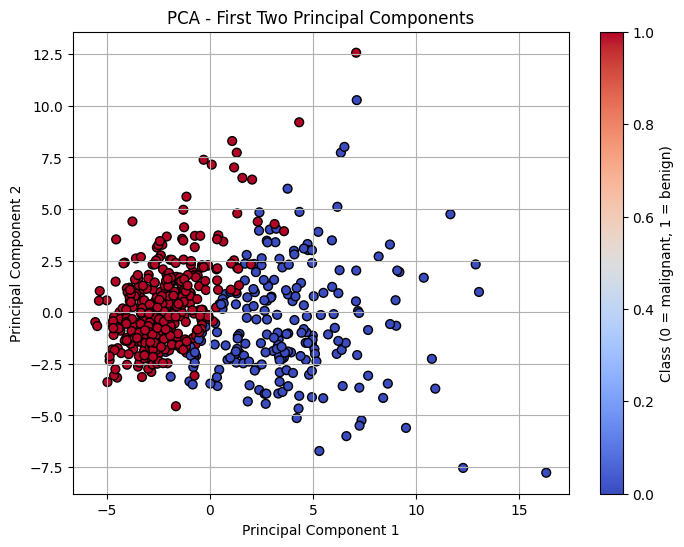

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Scale the data first (PCA is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot (explained variance)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Scree Plot - Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.show()
# Apply PCA again to retain 95% variance
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

print(f"📊 Number of components to retain 95% variance: {pca_95.n_components_}")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split both datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_pca_train, X_pca_test = train_test_split(X_pca_95, test_size=0.3, random_state=42)

# KNN on original data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_orig = knn_original.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

# KNN on PCA-reduced data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_train)  # same y_train
y_pred_pca = knn_pca.predict(X_pca_test)
acc_pca = accuracy_score(y_test, y_pred_pca)

print(f"🧪 Accuracy on original data: {acc_orig:.4f}")
print(f"🧪 Accuracy on PCA-reduced data (95% variance): {acc_pca:.4f}")
# First 2 components for visualization
pca_2 = PCA(n_components=2)
X_2d = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=40)
plt.title("PCA - First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Class (0 = malignant, 1 = benign)')
plt.grid(True)
plt.show()


**Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis**
**Task:**
**1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.**

📏 MSE (Euclidean, K=5): 4837.0363
📐 MSE (Manhattan, K=5): 5428.5875


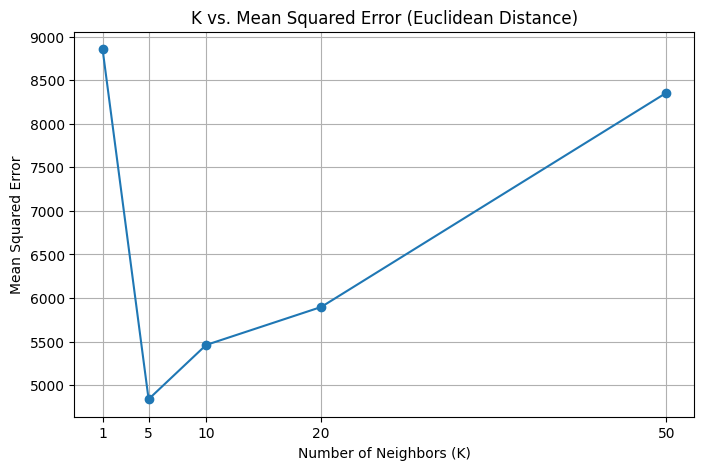

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features (important for distance-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# a. Euclidean Distance (default metric)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# b. Manhattan Distance
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

# Comparison
print(f"📏 MSE (Euclidean, K=5): {mse_euclidean:.4f}")
print(f"📐 MSE (Manhattan, K=5): {mse_manhattan:.4f}")
import matplotlib.pyplot as plt

k_values = [1, 5, 10, 20, 50]
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plotting K vs MSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_scores, marker='o')
plt.title("K vs. Mean Squared Error (Euclidean Distance)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.xticks(k_values)
plt.show()


**Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data**
**Task:**
**1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
Dataset: Pima Indians Diabetes**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 1. Load the data
# You can load via a CSV or from a known source. For example:
# Suppose you have “diabetes.csv” with columns: pregnancies, glucose, bp, skin, insulin, bmi, dpf, age, outcome
df = pd.read_csv('diabetes.csv')  # adjust path

# 2. Mark “missing” zero values as NaN for certain columns
cols_with_zero_invalid = ['glucose', 'bp', 'skin', 'insulin', 'bmi']
for col in cols_with_zero_invalid:
    df[col] = df[col].replace(0, np.nan)

# Separate features and target
X = df.drop(columns=['outcome'])
y = df['outcome']

# 3. Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# 4. Train/test split + scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train KNN with different algorithms
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    clf = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start = time.time()
    clf.fit(X_train_scaled, y_train)
    train_time = time.time() - start

    y_pred = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    results[algo] = {
        'classifier': clf,
        'train_time': train_time,
        'accuracy': acc
    }
    print(f"Algorithm: {algo}, Time: {train_time:.4f} sec, Accuracy: {acc:.4f}")

# 6. Pick best-performing method (highest accuracy or best trade-off) for decision boundary

best_algo = max(results.keys(), key=lambda a: results[a]['accuracy'])
best_clf = results[best_algo]['classifier']
print("Best algorithm:", best_algo)

# 7. Decision boundary plot using two features
# Choose two features. For example: 'glucose' and 'bmi' (you may pick others)
feat1 = 'glucose'
feat2 = 'bmi'
X2 = X[[feat1, feat2]]
# Impute again & split & scale for these two features
X2_imputed = pd.DataFrame(
    imputer.fit_transform(X2), columns=[feat1, feat2]
)
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2_imputed, y, test_size=0.3, random_state=42, stratify=y
)
# Scale
scaler2 = StandardScaler()
X2_train_s = scaler2.fit_transform(X2_train)
X2_test_s = scaler2.transform(X2_test)

clf2 = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
clf2.fit(X2_train_s, y2_train)

# Create mesh grid for boundary
x_min, x_max = X2_train_s[:, 0].min() - 1, X2_train_s[:, 0].max() + 1
y_min, y_max = X2_train_s[:, 1].min() - 1, X2_train_s[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf2.predict(grid).reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X2_train_s[:, 0], X2_train_s[:, 1], c=y2_train, cmap=cmap_bold, edgecolor='k')
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.title(f"Decision Boundary (KNN, algo={best_algo})")
plt.show()
